In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
JazzStandards = pd.read_csv("/kaggle/input/jazz-standards/JazzStandards.csv")

JazzStandards.head()

,Rank,Title,Year,Composer(s),Lyricist(s),URL
0,1,Body and Soul,1930,Johnny Green,"Edward Heyman, Robert Sour, Frank Eyton",https://www.jazzstandards.com/compositions-0/b...
1,2,All the Things You Are,1939,Jerome Kern,Oscar Hammerstein II,https://www.jazzstandards.com/compositions-0/a...
2,3,Summertime,1935,George Gershwin,DuBose Heyward,https://www.jazzstandards.com/compositions-0/s...
3,4,'Round Midnight,1944,"Cootie Williams, Thelonious Monk",Bernie Hanighen,https://www.jazzstandards.com/compositions-0/r...
4,5,I Can't Get Started (with You),1935,Vernon Duke,Ira Gershwin,https://www.jazzstandards.com/compositions-0/i...


# Year
## When did most of the jazz standards published?

### Top 10 Years

In [3]:
JazzStandards.groupby('Year')['Year'].count().sort_values(ascending=False)[:10]

Year
1938    41
1941    41
1937    37
1936    36
1944    35
1930    34
1934    33
1928    32
1929    32
1940    32
Name: Year, dtype: int64

Grouping and sorting by the year has demonstrated that **1938** and **1941** are the years when the most of the standards were published, with **41** standards in each. They are followed by **1937**, **1936**, and **1944** with **37**, **36** and **35** standards respectively.

### A list of the standards that was published in 1938:

In [4]:
songs_1938 = list(JazzStandards[JazzStandards['Year'] == '1938']['Title'].values)

print('Standards published in 1938:')
print()
for i in range(len(songs_1938)):
    print('- ' + songs_1938[i])

Standards published in 1938:

- Cherokee (Indian Love Song)
- You Go to My Head
- Prelude to a Kiss
- Love Is Here to Stay
- Over the Rainbow
- September Song
- This Can't Be Love
- Old Folks
- I Let a Song Go Out of My Heart
- One O'clock Jump
- Don't Be That Way
- Spring Is Here
- I Hadn't Anyone Till You
- Falling in Love with Love
- Jeepers Creepers
- Blue and Sentimental
- The Masquerade Is Over
- Get Out of Town
- Jumpin' At the Woodside
- I'll Be Seeing You
- Swinging the Blues
- A-Tisket, A-Tasket
- My Heart Belongs to Daddy
- Lullaby in Rhythm
- Baia
- When a Woman Loves a Man
- You Leave Me Breathless
- Please Be Kind
- Jeep Is Jumpin'
- Deep in a Dream
- The Flat Foot Floogie
- Roll 'Em
- Heart and Soul
- Sent for You Yesterday
- Two Sleepy People
- It's Wonderful
- My Reverie
- Every Tub
- Now It Can Be Told
- They Say
- Doggin' Around


### A list of the standards that was published in 1941:

In [5]:
songs_1941 = list(JazzStandards[JazzStandards['Year'] == '1941']['Title'].values)

print('Standards published in 1941:')
print()
for i in range(len(songs_1941)):
    print('- ' + songs_1941[i])

Standards published in 1941:

- Take the "A" Train
- I'll Remember April
- You Don't Know What Love Is
- I Got It Bad (and That Ain't Good)
- Skylark
- Everything Happens to Me
- Flamingo
- God Bless the Child
- Blues in the Night
- Chelsea Bridge
- Just Squeeze Me (But Don't Tease Me)
- Day Dream
- My Ship
- Besame Mucho
- Bewitched
- I'm Glad There Is You
- This Time the Dream's on Me
- Air Mail Special
- How About You
- Just A-Sittin' and A-Rockin'
- When the Sun Comes Out
- Don't Take Your Love from Me
- Goin' to Chicago Blues
- This Love of Mine
- 9:20 Special
- 'Tis Autumn
- Squatty Roo
- Violets for Your Furs
- Ev'rything I Love
- Salt Peanuts
- Jersey Bounce
- Jim
- Snowfall
- Dream Dancing
- Brazil
- Chattanooga Choo Choo
- Roll 'Em Pete
- Rocks in My Bed
- Let Me Off Uptown
- Jump for Joy
- String of Pearls


In [6]:
Top10Years = pd.Series(JazzStandards.groupby('Year')['Year'].count().sort_values(ascending=False)[:10].index)

print('Minimum:', Top10Years.min())
print('Maximum:', Top10Years.max())
print('Range: ' + str(int(Top10Years.max()) - int(Top10Years.min())))

Minimum: 1928
Maximum: 1944
Range: 16


Looking at the minimum and maximum values of the top 10 years revealed that most of the well-known jazz standards has been published between the years **1928** and **1944**, a range of **16** years.

## Visualizing Years

In [7]:
x_axis = JazzStandards[(JazzStandards['Year'] != 'rad.') & (JazzStandards['Year'] > '1910') & (JazzStandards['Year'] < '1969')].groupby('Year')['Year'].count().index
y_axis = JazzStandards[(JazzStandards['Year'] != 'rad.') & (JazzStandards['Year'] > '1910') & (JazzStandards['Year'] < '1969')].groupby('Year')['Year'].count()

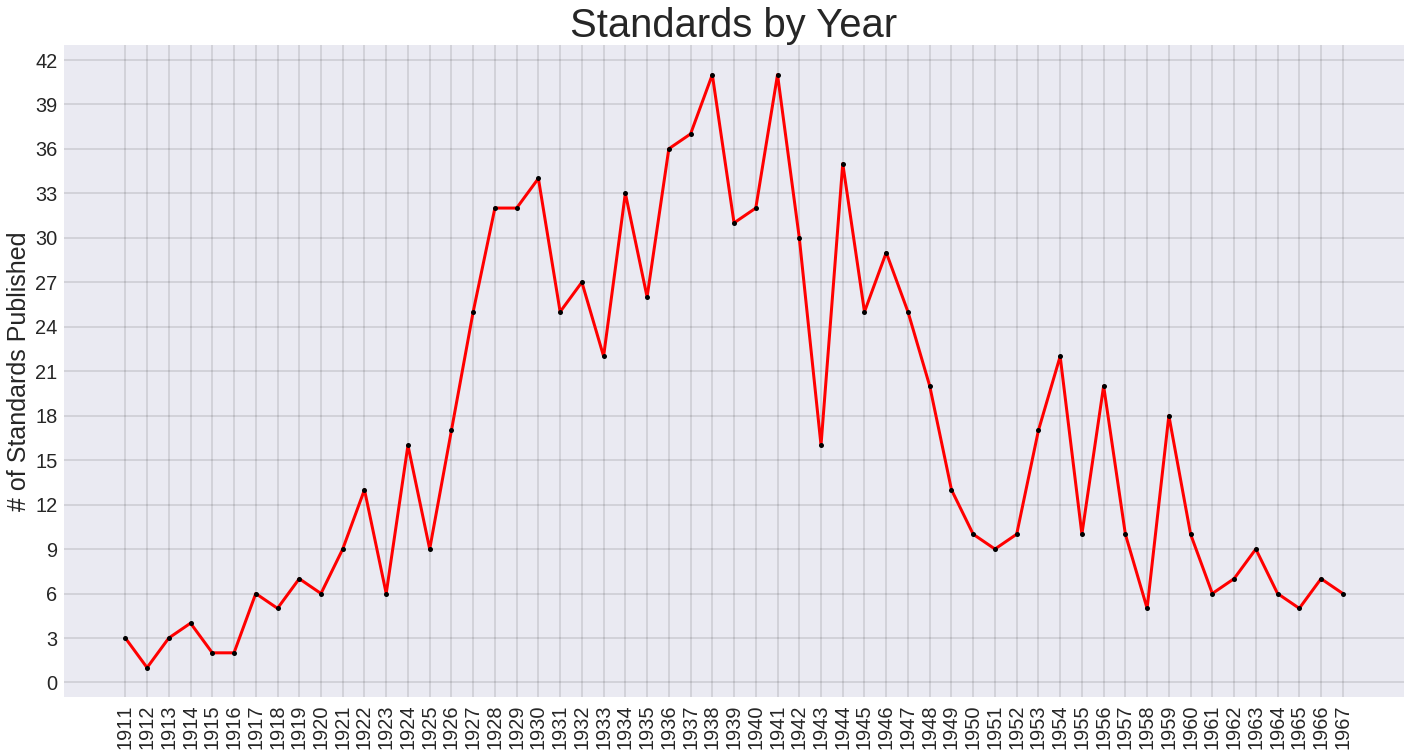

In [8]:
plt.style.use('seaborn')

plt.figure(figsize=(24,12))

plt.plot(x_axis, y_axis, color='red', linewidth=3, marker='o', markersize=5, mfc='k')

plt.title('Standards by Year', fontsize=40)
#plt.xlabel('Years', fontsize=25)
plt.ylabel('# of Standards Published', fontsize=25)

plt.xticks(rotation=90, fontsize=20)
plt.yticks(range(0, 43, 3), fontsize=20)

plt.grid(b=True, color='k', linewidth=0.2)

plt.show()

# Composers
## Composers with the most compositions

In [9]:
composer_lists = JazzStandards['Composer(s)'].apply(lambda x: x.split(', '))

In [10]:
composers = {}

In [11]:
for x in range(1000):
    for y in range(len(composer_lists[x])):
        if composer_lists[x][y] not in composers:
            composers[composer_lists[x][y]] = 1
        else:
            composers[composer_lists[x][y]] += 1

### Top 10 Composers

In [12]:
composers_df = pd.DataFrame(composers.items(), columns=['Composer', 'Num_Compositions']).sort_values('Num_Compositions', ascending=False).reset_index(drop=True)
composers_df.head(10)

,Composer,Num_Compositions
0,Duke Ellington,44
1,Richard Rodgers,35
2,Cole Porter,29
3,George Gershwin,29
4,Irving Berlin,24
5,Harold Arlen,22
6,Jerome Kern,21
7,Thelonious Monk,20
8,Harry Warren,20
9,Charlie Parker,20


In [13]:
print('Top 10 Composers with the most compositions in this dataset are:')
print()
for i in range(10):
    print(str(i+1) + '- ' + composers_df['Composer'][i] + ' with ' + str(composers_df['Num_Compositions'][i]) + ' compositions')

Top 10 Composers with the most compositions in this dataset are:

1- Duke Ellington with 44 compositions
2- Richard Rodgers with 35 compositions
3- Cole Porter with 29 compositions
4- George Gershwin with 29 compositions
5- Irving Berlin with 24 compositions
6- Harold Arlen with 22 compositions
7- Jerome Kern with 21 compositions
8- Thelonious Monk with 20 compositions
9- Harry Warren with 20 compositions
10- Charlie Parker with 20 compositions


## Visualizing Composers

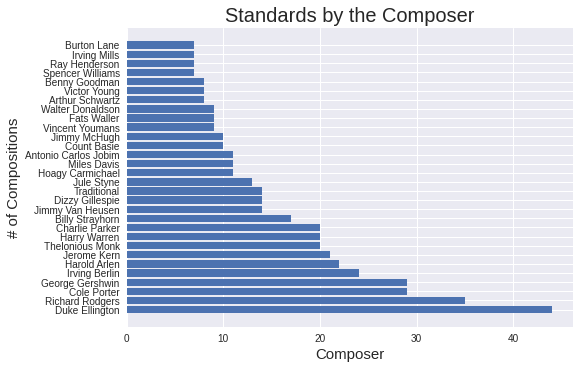

In [14]:
plt.style.use('seaborn')

plt.barh(composers_df['Composer'][:30], composers_df['Num_Compositions'][:30])

plt.title('Standards by the Composer', fontsize=20)
plt.xlabel('Composer', fontsize=15)
plt.ylabel('# of Compositions', fontsize=15)

plt.show()

## Compositions by the top 5 composers:
- **Duke Ellington**
- **Richard Rodgers**
- **Cole Porter**
- **George Gershwin**
- **Irving Berlin**

### Duke Ellington Compositions

In [15]:
Duke_compositions = []
for i in range(1000):
    if 'Duke Ellington' in JazzStandards['Composer(s)'][i]:
        Duke_compositions.append(JazzStandards.loc[i, 'Title'])

Here is a list of the compositions by **Duke Ellington**:

In [16]:
JazzStandards[JazzStandards['Title'].isin(Duke_compositions)]

,Rank,Title,Year,Composer(s),Lyricist(s),URL
16,17,Caravan,1936,"Duke Ellington, Juan Tizol",Irving Mills,https://www.jazzstandards.com/compositions-0/c...
18,19,In a Sentimental Mood,1935,Duke Ellington,"Irving Mills, Manny Kurtz",https://www.jazzstandards.com/compositions-0/i...
30,31,Sophisticated Lady,1933,Duke Ellington,"Irving Mills, Mitchell Parish",https://www.jazzstandards.com/compositions-0/s...
44,45,Satin Doll,1953,"Duke Ellington, Billy Strayhorn",Johnny Mercer,https://www.jazzstandards.com/compositions-0/s...
45,46,Prelude to a Kiss,1938,Duke Ellington,"Irving Gordon, Irving Mills",https://www.jazzstandards.com/compositions-0/p...
60,61,I Got It Bad (and That Ain't Good),1941,Duke Ellington,Paul Francis Webster,https://www.jazzstandards.com/compositions-0/i...
83,84,It Don't Mean a Thing,1932,Duke Ellington,Irving Mills,https://www.jazzstandards.com/compositions-0/i...
92,93,Do Nothin' Till You Hear from Me,1943,Duke Ellington,Bob Russell,https://www.jazzstandards.com/compositions-0/d...
103,104,Don't Get Around Much Anymore,1942,Duke Ellington,Bob Russell,https://www.jazzstandards.com/compositions-1/d...
135,136,Solitude,1934,Duke Ellington,"Eddie De Lange, Irving Mills",https://www.jazzstandards.com/compositions-1/s...


### Richard Rodgers Compositions

Here is a list of the compositions by **Richard Rodgers**:

In [17]:
Rodgers_compositions = []
for i in range(1000):
    if 'Richard Rodgers' in JazzStandards['Composer(s)'][i]:
        Rodgers_compositions.append(JazzStandards.loc[i, 'Title'])

In [18]:
JazzStandards[JazzStandards['Title'].isin(Rodgers_compositions)]

,Rank,Title,Year,Composer(s),Lyricist(s),URL
5,6,My Funny Valentine,1937,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-0/m...
81,82,I Didn't Know What Time It Was,1939,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-0/i...
90,91,My Romance,1935,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-0/m...
93,94,Blue Moon,1934,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-0/b...
113,114,It Might As Well Be Spring,1945,Richard Rodgers,Oscar Hammerstein II,https://www.jazzstandards.com/compositions-1/i...
117,118,Lover,1932,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-1/l...
122,123,This Can't Be Love,1938,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-1/t...
123,124,Little Girl Blue,1935,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-1/l...
180,181,It Never Entered My Mind,1940,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-1/i...
207,208,Where or When,1937,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-2/w...


### Cole Porter Compositions

In [19]:
Porter_compositions = []
for i in range(1000):
    if 'Cole Porter' in JazzStandards['Composer(s)'][i]:
        Porter_compositions.append(JazzStandards.loc[i, 'Title'])

Here is a list of the compositions by **Cole Porter**:

In [20]:
JazzStandards[JazzStandards['Title'].isin(Porter_compositions)]

,Rank,Title,Year,Composer(s),Lyricist(s),URL
7,8,What Is This Thing Called Love?,1930,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-0/w...
29,30,Love for Sale,1930,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-0/l...
32,33,Night and Day,1932,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-0/n...
73,74,Just One of Those Things,1935,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-0/j...
118,119,I Love You,1944,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-1/i...
121,122,Easy to Love,1936,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-1/e...
138,139,I Get a Kick Out of You,1934,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-1/i...
159,160,I've Got You Under My Skin,1936,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-1/i...
187,188,You'd Be So Nice to Come Home To,1942,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-1/y...
208,209,In the Still of the Night,1937,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-2/i...


### George Gershwin Compositions

Here is a list of the compositions by **George Gershwin**:

In [21]:
Gershwin_compositions = []
for i in range(1000):
    if 'George Gershwin' in JazzStandards['Composer(s)'][i]:
        Gershwin_compositions.append(JazzStandards.loc[i, 'Title'])

In [22]:
JazzStandards[JazzStandards['Title'].isin(Gershwin_compositions)]

,Rank,Title,Year,Composer(s),Lyricist(s),URL
2,3,Summertime,1935,George Gershwin,DuBose Heyward,https://www.jazzstandards.com/compositions-0/s...
17,18,The Man I Love,1924,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/t...
21,22,"Oh, Lady Be Good!",1924,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/o...
23,24,Embraceable You,1930,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/e...
53,54,But Not for Me,1930,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/b...
56,57,Love Is Here to Stay,1938,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/l...
72,73,I Got Rhythm,1930,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/i...
76,77,Someone to Watch Over Me,1926,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/s...
85,86,They Can't Take That Away from Me,1937,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/t...
87,88,A Foggy Day,1937,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/a...


### Irving Berlin Compositions

Here is a list of the compositions by **Irving Berlin**:

In [23]:
Berlin_compositions = []
for i in range(1000):
    if 'Irving Berlin' in JazzStandards['Composer(s)'][i]:
        Berlin_compositions.append(JazzStandards.loc[i, 'Title'])

In [24]:
JazzStandards[JazzStandards['Title'].isin(Berlin_compositions)]

,Rank,Title,Year,Composer(s),Lyricist(s),URL
48,49,How Deep Is the Ocean?,1932,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-0/h...
128,129,Blue Skies,1927,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-1/b...
186,187,Cheek to Cheek,1935,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-1/c...
301,302,Always,1925,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-3/a...
344,345,They Say It's Wonderful,1946,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-3/t...
361,362,Remember,1925,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-3/r...
403,404,White Christmas,1940,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-4/w...
468,469,Russian Lullaby,1927,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-4/r...
577,578,Alexander's Ragtime Band,1911,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-5/a...
597,598,The Song Is Ended,1927,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-5/t...


# Lyrics
## Lyricists with the most lyrics

In [25]:
lyrics_lists = JazzStandards['Lyricist(s)'].apply(lambda x: x.split(', '))

In [26]:
lyricists = {}

In [27]:
for x in range(1000):
    for y in range(len(lyrics_lists[x])):
        if lyrics_lists[x][y] not in lyricists:
            lyricists[lyrics_lists[x][y]] = 1
        else:
            lyricists[lyrics_lists[x][y]] += 1

## Top 10 Lyricists

In [28]:
lyrics_df = pd.DataFrame(lyricists.items(), columns=['Lyricist', 'Num_Lyrics']).sort_values('Num_Lyrics', ascending=False).reset_index(drop=True)
lyrics_df.head(10)

,Lyricist,Num_Lyrics
0,Johnny Mercer,32
1,Lorenz Hart,29
2,Cole Porter,29
3,Ira Gershwin,29
4,Irving Berlin,24
5,Sammy Cahn,21
6,Gus Kahn,20
7,Charlie Parker,20
8,Oscar Hammerstein II,20
9,Duke Ellington,19


In [29]:
print('Top 10 Lyricists with the most lyrics in this dataset are:')
print()

for i in range(10):
    print(str(i+1) + '- ' + lyrics_df['Lyricist'][i] + ' with ' + str(lyrics_df['Num_Lyrics'][i]) + ' lyrics')

Top 10 Lyricists with the most lyrics in this dataset are:

1- Johnny Mercer with 32 lyrics
2- Lorenz Hart with 29 lyrics
3- Cole Porter with 29 lyrics
4- Ira Gershwin with 29 lyrics
5- Irving Berlin with 24 lyrics
6- Sammy Cahn with 21 lyrics
7- Gus Kahn with 20 lyrics
8- Charlie Parker with 20 lyrics
9- Oscar Hammerstein II with 20 lyrics
10- Duke Ellington with 19 lyrics


## Visualizing Lyricists

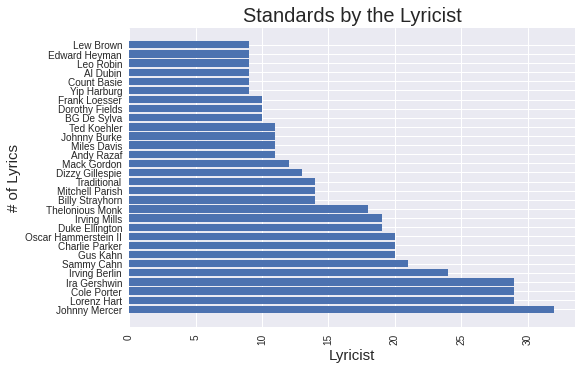

In [30]:
plt.style.use('seaborn')

plt.barh(lyrics_df['Lyricist'][:30], lyrics_df['Num_Lyrics'][:30])

plt.title('Standards by the Lyricist', fontsize=20)
plt.xlabel('Lyricist', fontsize=15)
plt.ylabel('# of Lyrics', fontsize=15)

plt.xticks(rotation=90)


plt.show()

## Lyrics by the top 5 lyricists:
- **Johnny Mercer**
- **Lorenz Hart**
- **Cole Porter**
- **Ira Gershwin**
- **Irving Berlin**

### Lyrics written by Johnny Mercer

In [31]:
Mercer_lyrics = []
for i in range(1000):
    if 'Johnny Mercer' in JazzStandards['Lyricist(s)'][i]:
        Mercer_lyrics.append(JazzStandards.loc[i, 'Title'])

Here is a list of the standards whose lyrics written by **Johnny Mercer**:

In [32]:
JazzStandards[JazzStandards['Title'].isin(Mercer_lyrics)]

,Rank,Title,Year,Composer(s),Lyricist(s),URL
10,11,Autumn Leaves (Les Feuilles Mortes),1947,Joseph Kosma,"Johnny Mercer, Jacques Prevert",https://www.jazzstandards.com/compositions-0/a...
34,35,Laura,1945,David Raksin,Johnny Mercer,https://www.jazzstandards.com/compositions-0/l...
44,45,Satin Doll,1953,"Duke Ellington, Billy Strayhorn",Johnny Mercer,https://www.jazzstandards.com/compositions-0/s...
50,51,Come Rain or Come Shine,1946,Harold Arlen,Johnny Mercer,https://www.jazzstandards.com/compositions-0/c...
61,62,Skylark,1941,Hoagy Carmichael,Johnny Mercer,https://www.jazzstandards.com/compositions-0/s...
107,108,I Thought About You,1939,Jimmy Van Heusen,Johnny Mercer,https://www.jazzstandards.com/compositions-1/i...
115,116,I Remember You,1942,Victor Schertzinger,Johnny Mercer,https://www.jazzstandards.com/compositions-1/i...
134,135,Days of Wine and Roses,1962,Henry N. Mancini,Johnny Mercer,https://www.jazzstandards.com/compositions-1/d...
179,180,That Old Black Magic,1942,Harold Arlen,Johnny Mercer,https://www.jazzstandards.com/compositions-1/t...
206,207,Blues in the Night,1941,Harold Arlen,Johnny Mercer,https://www.jazzstandards.com/compositions-2/b...


### Lyrics written by Lorenz Hart

In [33]:
Hart_lyrics = []
for i in range(1000):
    if 'Lorenz Hart' in JazzStandards['Lyricist(s)'][i]:
        Hart_lyrics.append(JazzStandards.loc[i, 'Title'])

Here is a list of the standards whose lyrics written by **Lorenz Hart**:

In [34]:
JazzStandards[JazzStandards['Title'].isin(Hart_lyrics)]

,Rank,Title,Year,Composer(s),Lyricist(s),URL
5,6,My Funny Valentine,1937,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-0/m...
81,82,I Didn't Know What Time It Was,1939,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-0/i...
90,91,My Romance,1935,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-0/m...
93,94,Blue Moon,1934,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-0/b...
117,118,Lover,1932,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-1/l...
122,123,This Can't Be Love,1938,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-1/t...
123,124,Little Girl Blue,1935,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-1/l...
180,181,It Never Entered My Mind,1940,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-1/i...
207,208,Where or When,1937,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-2/w...
221,222,Have You Met Miss Jones,1937,Richard Rodgers,Lorenz Hart,https://www.jazzstandards.com/compositions-2/h...


### Lyrics written by Cole Porter

In [35]:
Porter_lyrics = []
for i in range(1000):
    if 'Cole Porter' in JazzStandards['Lyricist(s)'][i]:
        Porter_lyrics.append(JazzStandards.loc[i, 'Title'])

Here is a list of the standards whose lyrics written by **Cole Porter**:

In [36]:
JazzStandards[JazzStandards['Title'].isin(Porter_lyrics)]

,Rank,Title,Year,Composer(s),Lyricist(s),URL
7,8,What Is This Thing Called Love?,1930,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-0/w...
29,30,Love for Sale,1930,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-0/l...
32,33,Night and Day,1932,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-0/n...
73,74,Just One of Those Things,1935,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-0/j...
118,119,I Love You,1944,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-1/i...
121,122,Easy to Love,1936,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-1/e...
138,139,I Get a Kick Out of You,1934,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-1/i...
159,160,I've Got You Under My Skin,1936,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-1/i...
187,188,You'd Be So Nice to Come Home To,1942,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-1/y...
208,209,In the Still of the Night,1937,Cole Porter,Cole Porter,https://www.jazzstandards.com/compositions-2/i...


### Lyrics written by Ira Gershwin

In [37]:
Gershwin_lyrics = []
for i in range(1000):
    if 'Ira Gershwin' in JazzStandards['Lyricist(s)'][i]:
        Gershwin_lyrics.append(JazzStandards.loc[i, 'Title'])

Here is a list of the standards whose lyrics written by **Ira Gershwin**:

In [38]:
JazzStandards[JazzStandards['Title'].isin(Gershwin_lyrics)]

,Rank,Title,Year,Composer(s),Lyricist(s),URL
4,5,I Can't Get Started (with You),1935,Vernon Duke,Ira Gershwin,https://www.jazzstandards.com/compositions-0/i...
17,18,The Man I Love,1924,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/t...
21,22,"Oh, Lady Be Good!",1924,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/o...
23,24,Embraceable You,1930,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/e...
53,54,But Not for Me,1930,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/b...
56,57,Love Is Here to Stay,1938,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/l...
72,73,I Got Rhythm,1930,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/i...
76,77,Someone to Watch Over Me,1926,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/s...
85,86,They Can't Take That Away from Me,1937,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/t...
87,88,A Foggy Day,1937,George Gershwin,Ira Gershwin,https://www.jazzstandards.com/compositions-0/a...


### Lyrics written by Irving Berlin

In [39]:
Berlin_lyrics = []
for i in range(1000):
    if 'Irving Berlin' in JazzStandards['Lyricist(s)'][i]:
        Berlin_lyrics.append(JazzStandards.loc[i, 'Title'])

Here is a list of the standards whose lyrics written by **Irving Berlin**:

In [40]:
JazzStandards[JazzStandards['Title'].isin(Berlin_lyrics)]

,Rank,Title,Year,Composer(s),Lyricist(s),URL
48,49,How Deep Is the Ocean?,1932,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-0/h...
128,129,Blue Skies,1927,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-1/b...
186,187,Cheek to Cheek,1935,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-1/c...
301,302,Always,1925,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-3/a...
344,345,They Say It's Wonderful,1946,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-3/t...
361,362,Remember,1925,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-3/r...
403,404,White Christmas,1940,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-4/w...
468,469,Russian Lullaby,1927,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-4/r...
577,578,Alexander's Ragtime Band,1911,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-5/a...
597,598,The Song Is Ended,1927,Irving Berlin,Irving Berlin,https://www.jazzstandards.com/compositions-5/t...
